In [65]:
using StatsPlots
using StatsBase
pyplot()

Plots.PyPlotBackend()

In [66]:
# two-universal hash function
# P(h(x) == h(y)) <= 1/n
function twouniversalhash(n::Integer)::Function
    p::Integer = 49347083 # large prime
    a::Integer = rand(1:p)
    b::Integer = rand(1:p)
    h(x::Integer)::Integer = mod(mod(a*x + b, p), n)
    return h
end

twouniversalhash (generic function with 1 method)

In [67]:
# n = 100,000 instances of twouniversalhash
hashers = [twouniversalhash(100) for _ in 1:100000];

In [80]:
one_hashes = []
for h in hashers
    push!(one_hashes, h(1))
end
one_hashes = convert(Array{Integer}, one_hashes);

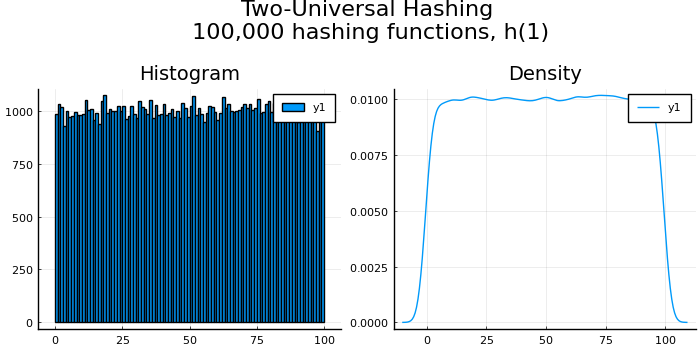

In [81]:
plot(
    histogram(one_hashes, bins=100, title="Histogram"),
    density(one_hashes, title="Density"),
    plot_title="Two-Universal Hashing\n 100,000 hashing functions, h(1)",
    size=(700, 350)
) # Nice flat distribution as expected

In [82]:
two_hashes = []
for h in hashers
    push!(two_hashes, h(2))
end
two_hashes = convert(Array{Integer}, two_hashes);

In [83]:
# P(h(x) == h(y)) <= 1/n

collisions = sum(one_hashes .== two_hashes)
expected_collisions = convert(Integer, 100000 * (1/100))
println("expected collisions: $expected_collisions")
println("collisions: $collisions")

expected collisions: 1000
collisions: 1004
